In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Loading files

In [2]:
df_patient_info = pd.read_csv('../T1DiabetesGranada/Patient_info.csv', dtype={'Number_of_days_with_measures':np.int32, 'Number_of_measurements':np.int32})
df_glucose_measurements = pd.read_csv('../T1DiabetesGranada/Glucose_measurements.csv', dtype={'Measurement' : np.int16})
df_biochemical_parameters = pd.read_csv('../T1DiabetesGranada/Biochemical_parameters.csv')
df_diagnostics = pd.read_csv('../T1DiabetesGranada/Diagnostics.csv')

In [3]:
df_patient_info.name = 'Patient_info.csv'
df_glucose_measurements.name = 'Glucose_measurements.csv'
df_biochemical_parameters.name = 'Biochemical_parameters.csv'
df_diagnostics.name = 'Diagnostics.csv'

In [4]:
datasets_list = [df_patient_info, df_glucose_measurements, df_biochemical_parameters, df_diagnostics]
datasets_list.reverse()

# General files description

In [5]:
general_table = pd.DataFrame(columns=['File Name', 'Number of instances', 'Number of features', 'Size (Bytes)', 'Lost values'])
for current_df in datasets_list:
    current_dic = {'File Name': current_df.name,
                   'Number of instances': current_df.shape[0],
                   'Number of features': current_df.shape[1],
                   'Size (Bytes)': current_df.size,
                   'Lost values': 'Yes' if current_df.isnull().values.any() else 'No'
                }
    series_values = pd.Series(current_dic)
    general_table = pd.concat([pd.DataFrame([series_values]), general_table])

general_table

File Name Number of instances Number of features  \
0            Patient_info.csv                 736                 11   
0    Glucose_measurements.csv            22671708                  4   
0  Biochemical_parameters.csv               87482                  4   
0             Diagnostics.csv                1757                  3   

  Size (Bytes) Lost values  
0         8096         Yes  
0     90686832          No  
0       349928          No  
0         5271          No

# ***Patient_info.csv***

## Distribution of the age of the patients at the start of the data collection (January 6th, 2018).


In [6]:
def get_age_in(birth_year:str, in_year:str) -> int:
    """
    From a string (in YYYY) get the age of the patient in a given date
    :param birth_year:  year of birth of the patient as a string
    :param in_year: year from where the age will be calculated
    :return: An integer with the age of the patient
    """
    birth_year_int = int(birth_year)
    in_year_int = int(in_year)

    age = in_year_int - birth_year_int

    return age

In [7]:
df_patient_info['Age'] = df_patient_info.apply(lambda row: get_age_in(row['Birth_year'], '2017'),axis=1)
series_age = df_patient_info['Age']

fig = plt.figure(figsize =(10, 4), tight_layout = True)
ax = fig.add_subplot(111)
bin_set = np.arange(10,86,5)
n, bins, patches = ax.hist(series_age, histtype='bar', align='mid', bins=bin_set, color='darkgray', edgecolor = "black")
ax.grid(axis='y', linestyle=':', linewidth='0.3', color='black')

bins_x = np.insert(bin_set, 0, [0 , 5])
x_ticks_labels = list(map(str, bins_x))
x_ticks = ax.xaxis.set_ticks(bins_x)
x_labels = ax.xaxis.set_ticklabels(x_ticks_labels)

y_ticks_values = np.arange(0,101,10)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

lim = ax.set_xlim(xmin=9, xmax=86)

y_title = ax.set_ylabel('Number of patients')
x_title = ax.set_xlabel('Age')

## Stats

In [8]:
print('Min age: ', series_age.min())
print('Max age: ', series_age.max())
print()
print(series_age.describe())

Min age:  12
Max age:  81

count    736.000000
mean      40.336957
std       15.772724
min       12.000000
25%       27.000000
50%       40.000000
75%       52.000000
max       81.000000
Name: Age, dtype: float64


## Number of patients by number of days with glucose levels measurements

### Stats

In [9]:
print(df_patient_info['Number_of_days_with_measures'].describe())

count     736.000000
mean      350.244565
std       284.146680
min         8.000000
25%       122.000000
50%       286.000000
75%       525.000000
max      1463.000000
Name: Number_of_days_with_measures, dtype: float64


### Bar graph

In [10]:
fig = plt.figure(figsize =(14, 5), tight_layout = True)
ax = fig.add_subplot(111)

bin_set = np.arange(0,1501,5)

n, bins, patches = ax.hist(df_patient_info[df_patient_info['Number_of_days_with_measures'] < 365]['Number_of_days_with_measures'], histtype='bar', align='mid', color='palegreen', bins=bin_set, edgecolor = "black", label='< 1 year')
n, bins, patches = ax.hist(df_patient_info[(df_patient_info['Number_of_days_with_measures'] >= 365) & (df_patient_info['Number_of_days_with_measures'] <= 730)]['Number_of_days_with_measures'], histtype='bar', align='mid', color='cornflowerblue', bins=bin_set, edgecolor = "black", label='1 year - 2 years')
n, bins, patches = ax.hist(df_patient_info[(df_patient_info['Number_of_days_with_measures'] > 730) & (df_patient_info['Number_of_days_with_measures'] <= 1095)]['Number_of_days_with_measures'], histtype='bar', align='mid', color='lightcoral', bins=bin_set, edgecolor = "black", label='2 - 3 years')
n, bins, patches = ax.hist(df_patient_info[(df_patient_info['Number_of_days_with_measures'] > 1095) & (df_patient_info['Number_of_days_with_measures'] <= 1460)]['Number_of_days_with_measures'], histtype='bar', align='mid', color='darkorchid', bins=bin_set, edgecolor = "black", label='3 - 4 years')
n, bins, patches = ax.hist(df_patient_info[(df_patient_info['Number_of_days_with_measures'] > 1460)]['Number_of_days_with_measures'], histtype='bar', align='mid', color='gold', bins=bin_set, edgecolor = "black", label='> 4 years')

plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

average_days_with_measures = df_patient_info['Number_of_days_with_measures'].mean()

average_days_with_measures = df_patient_info['Number_of_days_with_measures'].mean()

ax.axvline(average_days_with_measures, color='dimgray', linestyle='solid', linewidth=2)
ax.text(average_days_with_measures + 5, 15, f'Mean: {average_days_with_measures:.2f} days', color='dimgray')

ax.legend()

bins_x = np.arange(0,1501,50)
x_ticks_labels = list(map(str, bins_x))
x_ticks = ax.xaxis.set_ticks(bins_x)
x_labels = ax.xaxis.set_ticklabels(x_ticks_labels)

y_title = ax.set_ylabel('Number of patients')
x_title = ax.set_xlabel('Number of days')

lim_x = ax.set_xlim(xmin=-1, xmax=1500)
lim_y = ax.set_ylim(ymax=16)

In [11]:
print('Min Number_of_days_with_measures: ', df_patient_info['Number_of_days_with_measures'].min())
print('Max Number_of_days_with_measures: ', df_patient_info['Number_of_days_with_measures'].max())

Min Number_of_days_with_measures:  8
Max Number_of_days_with_measures:  1463


## Total days with measurements

In [12]:
print(df_patient_info['Number_of_days_with_measures'].sum())

257780


## Number of measurements stats

In [13]:
print(df_patient_info['Number_of_measurements'].describe())

count       736.000000
mean      30802.951087
std       25704.868842
min         400.000000
25%       10673.000000
50%       25002.500000
75%       45686.500000
max      137292.000000
Name: Number_of_measurements, dtype: float64


## Number of biochemical parameters stats

In [14]:
print(df_patient_info['Number_of_biochemical_parameters'].describe())

count    723.000000
mean     120.998617
std       87.834182
min        4.000000
25%       75.000000
50%      107.000000
75%      137.000000
max      846.000000
Name: Number_of_biochemical_parameters, dtype: float64


## Number of diagnostics stats

In [15]:
print(df_patient_info['Number_of_diagnostics'].describe())

count    511.000000
mean       3.438356
std        2.946519
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       24.000000
Name: Number_of_diagnostics, dtype: float64


# ***Glucose_measurements.csv***

## Measurement

### Data distribution of the glucose levels measurements

#### Stats

In [16]:
print(df_glucose_measurements['Measurement'].describe())

count    2.267171e+07
mean     1.647837e+02
std      7.157474e+01
min      4.000000e+01
25%      1.120000e+02
50%      1.530000e+02
75%      2.060000e+02
max      5.000000e+02
Name: Measurement, dtype: float64


#### Plot

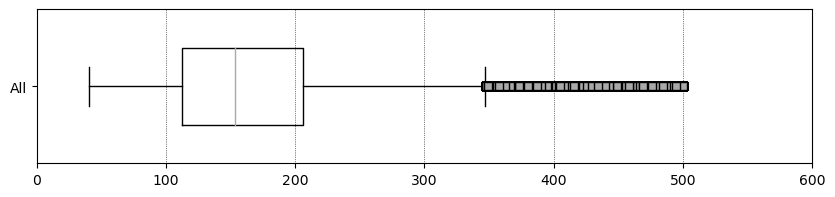

In [17]:
darkgray_square = dict(markerfacecolor='darkgray', marker='s')

fig, ax = plt.subplots(figsize=(10,2))

bp = ax.boxplot(df_glucose_measurements['Measurement'], vert=False, flierprops=darkgray_square, widths=0.5)

for median in bp['medians']:
    median.set_color('darkgray')

x_ticks_values = np.arange(0, 601, 100)
x_ticks_labels = list(map(str, x_ticks_values))
x_ticks = ax.xaxis.set_ticks(x_ticks_values)
x_labels = ax.xaxis.set_ticklabels(x_ticks_labels)

y_labels = ax.yaxis.set_ticklabels(['All'])

ax.grid(axis='x', linestyle=':', linewidth='0.5', color='black')

In [18]:
for key in bp:
    print(f'{key}: {[item.get_xdata() for item in bp[key]]}\n')

whiskers: [array([112.,  40.]), array([206., 347.])]

caps: [array([40, 40], dtype=int16), array([347, 347], dtype=int16)]

boxes: [array([112., 112., 206., 206., 112.])]

medians: [array([153., 153.])]

fliers: [array([365, 379, 376, ..., 349, 356, 358], dtype=int16)]

means: []


### Data distribution of the glucose levels measurements by sex

In [19]:
def remove_patients_by_ID_list_from_df(remove_list: pd.Series, df_source: pd.DataFrame) -> pd.DataFrame:
    """
    From a continuous glucose dataframe remove a list of patients and return the remaning rows
    :param remove_list: List o patients IDs to remove from the dataframe
    :param df_source: Dataframe from where to remove the patients IDs
    :return: The dataframe without the patients in @remove_list
    """
    if remove_list.empty:
        return df_source

    id_column = df_source.columns[0] # The ID must be the first column of the dataframe
    filt = True
    for current_patient in remove_list:
        filt = (filt & (df_source[id_column] != current_patient)) # On each iteration find the intersection between the current
                                                                 # boolean array and the cumulated one (In the first iteration is just 'True')

    df_result = df_source[filt] # Applying the created filter
    df_result.reset_index(inplace=True, drop=True)

    return df_result

In [20]:
def leave_patients_by_ID_list_from_df(leave_list: pd.Series, df_source: pd.DataFrame) -> pd.DataFrame:
    """
    From a continuous glucose dataframe return the dataframe with just the patient from the list
    :param leave_list: List o patients IDs to leave in the dataframe
    :param df_source: Dataframe from where to remove the patients IDs
    :return: The dataframe with just the patients in @leave_list
    """
    if leave_list.empty:
        return df_source

    id_column = df_source.columns[0] # The ID must be the first column of the dataframe
    filt = False
    for current_patient in leave_list:
        filt = (filt | (df_source[id_column] == current_patient)) # On each iteration find the disjunction between the current
                                                                 # boolean array and the cumulated one (In the first iteration is just 'False')

    df_result = df_source[filt] # Applying the created filter negated
    df_result.reset_index(inplace=True, drop=True)

    return df_result

In [21]:
male_patient_ID_series = df_patient_info[df_patient_info['Sex'] == 'M']['Patient_ID'] # IDs of the male patients
female_patient_ID_series = df_patient_info[df_patient_info['Sex'] == 'F']['Patient_ID'] # IDs of the female patients

In [22]:
df_glucose_masculine = leave_patients_by_ID_list_from_df(leave_list=male_patient_ID_series, df_source=df_glucose_measurements)
print(df_glucose_masculine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10771479 entries, 0 to 10771478
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Patient_ID        object
 1   Measurement_date  object
 2   Measurement_time  object
 3   Measurement       int16 
dtypes: int16(1), object(3)
memory usage: 267.1+ MB
None


In [23]:
df_glucose_female = leave_patients_by_ID_list_from_df(leave_list=female_patient_ID_series, df_source=df_glucose_measurements)
print(df_glucose_female.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900229 entries, 0 to 11900228
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Patient_ID        object
 1   Measurement_date  object
 2   Measurement_time  object
 3   Measurement       int16 
dtypes: int16(1), object(3)
memory usage: 295.1+ MB
None


#### Box plot

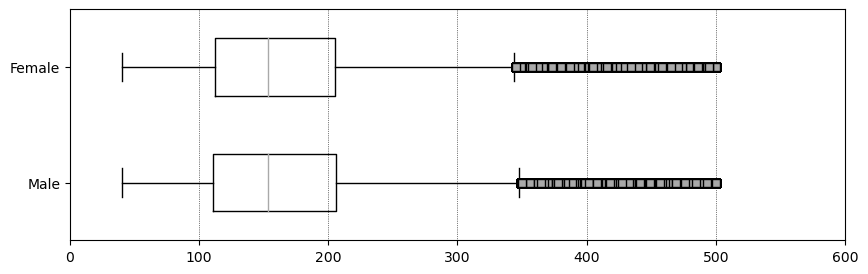

In [24]:
sex_plot_data = [df_glucose_masculine['Measurement'], df_glucose_female['Measurement']]
darkgray_square = dict(markerfacecolor='darkgray', marker='s')

fig, ax = plt.subplots(figsize=(10,3))

bp = ax.boxplot(sex_plot_data, vert=False, flierprops=darkgray_square, widths=0.5)

for median in bp['medians']:
    median.set_color('darkgray')

x_ticks_values = np.arange(0, 601, 100)
x_ticks_labels = list(map(str, x_ticks_values))
x_ticks = ax.xaxis.set_ticks(x_ticks_values)
x_labels = ax.xaxis.set_ticklabels(x_ticks_labels)

y_labels = ax.yaxis.set_ticklabels(['Male', 'Female'])

ax.grid(axis='x', linestyle=':', linewidth='0.5', color='black')

plt.show()

### Data distribution of the glucose levels measurements by age

In [25]:
# Creating patient age ranks
young_patient_ID_series = df_patient_info[df_patient_info['Age'] < 31]['Patient_ID'] # Patients with age < 31
young_adult_patient_ID_series = df_patient_info[(df_patient_info['Age'] >= 31) & (df_patient_info['Age'] < 46)]['Patient_ID'] # Patients with 31 <= age < 46
adult_patient_ID_series = df_patient_info[(df_patient_info['Age'] >= 46) & (df_patient_info['Age'] < 66)]['Patient_ID'] # Patients with 46 <= age < 65
elders_patient_ID_series = df_patient_info[(df_patient_info['Age'] >= 66)]['Patient_ID'] # Patients with  age >= 66

In [26]:
df_glucose_young = leave_patients_by_ID_list_from_df(leave_list=young_patient_ID_series, df_source=df_glucose_measurements) # Glucose_measurement subset dataframe with young patients
print(df_glucose_young.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8725792 entries, 0 to 8725791
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Patient_ID        object
 1   Measurement_date  object
 2   Measurement_time  object
 3   Measurement       int16 
dtypes: int16(1), object(3)
memory usage: 216.4+ MB
None


In [27]:
df_glucose_young_adult = leave_patients_by_ID_list_from_df(leave_list=young_adult_patient_ID_series, df_source=df_glucose_measurements) # Glucose_measurement subset dataframe with young adult patients
print(df_glucose_young_adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525977 entries, 0 to 6525976
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Patient_ID        object
 1   Measurement_date  object
 2   Measurement_time  object
 3   Measurement       int16 
dtypes: int16(1), object(3)
memory usage: 161.8+ MB
None


In [28]:
df_glucose_adult = leave_patients_by_ID_list_from_df(leave_list=adult_patient_ID_series, df_source=df_glucose_measurements) # Glucose_measurement subset dataframe with adult patients
print(df_glucose_adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763280 entries, 0 to 6763279
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Patient_ID        object
 1   Measurement_date  object
 2   Measurement_time  object
 3   Measurement       int16 
dtypes: int16(1), object(3)
memory usage: 167.7+ MB
None


In [29]:
df_glucose_elders = leave_patients_by_ID_list_from_df(leave_list=elders_patient_ID_series, df_source=df_glucose_measurements) # Glucose_measurement subset dataframe with elder patients
print(df_glucose_elders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656659 entries, 0 to 656658
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Patient_ID        656659 non-null  object
 1   Measurement_date  656659 non-null  object
 2   Measurement_time  656659 non-null  object
 3   Measurement       656659 non-null  int16 
dtypes: int16(1), object(3)
memory usage: 16.3+ MB
None


#### Boxplot

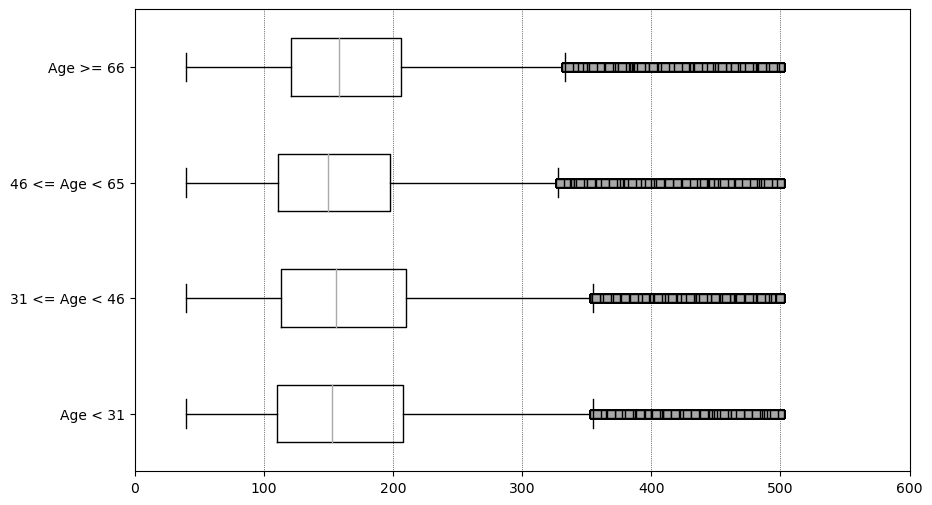

In [30]:
age_vs_measurement_plot_data = [df_glucose_young['Measurement'], df_glucose_young_adult['Measurement'], df_glucose_adult['Measurement'], df_glucose_elders['Measurement']]
darkgray_square = dict(markerfacecolor='darkgray', marker='s')

fig, ax = plt.subplots(figsize=(10,6))

bp = ax.boxplot(age_vs_measurement_plot_data, vert=False, flierprops=darkgray_square, widths=0.5)

for median in bp['medians']:
    median.set_color('darkgray')

x_ticks_values = np.arange(0, 601, 100)
x_ticks_labels = list(map(str, x_ticks_values))
x_ticks = ax.xaxis.set_ticks(x_ticks_values)
x_labels = ax.xaxis.set_ticklabels(x_ticks_labels)

y_labels = ax.yaxis.set_ticklabels(['Age < 31', '31 <= Age < 46', '46 <= Age < 65', 'Age >= 66'])

ax.grid(axis='x', linestyle=':', linewidth='0.5', color='black')

plt.show()

### Percentage of measurements per glucose levels ranges and age

In [31]:
def calc_ranges(df_measurements:pd.DataFrame) -> []:
    too_low_glucose_serie = df_measurements[df_measurements['Measurement'] < 54]['Measurement'].shape[0] # glucose < 54
    low_glucose_serie = df_measurements[(df_measurements['Measurement'] >= 54) & (df_measurements['Measurement'] <= 69)]['Measurement'].shape[0] # 54 <= glucose <= 69
    ok_glucose_serie = df_measurements[(df_measurements['Measurement'] >= 70) & (df_measurements['Measurement'] <= 180)]['Measurement'].shape[0] # 70 <= glucose <= 180
    high_glucose_serie = df_measurements[(df_measurements['Measurement'] >= 181) & (df_measurements['Measurement'] <= 250)]['Measurement'].shape[0] # 181 <= glucose < 250
    too_high_glucose_serie = df_measurements[df_measurements['Measurement'] > 250]['Measurement'].shape[0] # glucose >= 250
    
    return [too_low_glucose_serie, low_glucose_serie, ok_glucose_serie, high_glucose_serie, too_high_glucose_serie]

In [32]:
young_values = calc_ranges(df_glucose_young)
young_adults_values = calc_ranges(df_glucose_young_adult)
adults_values = calc_ranges(df_glucose_adult)
elder_values = calc_ranges(df_glucose_elders)

# Create a 2D NumPy array from the lists
array2d = np.array([young_values, young_adults_values, adults_values, elder_values])


#### Stacked bar graph

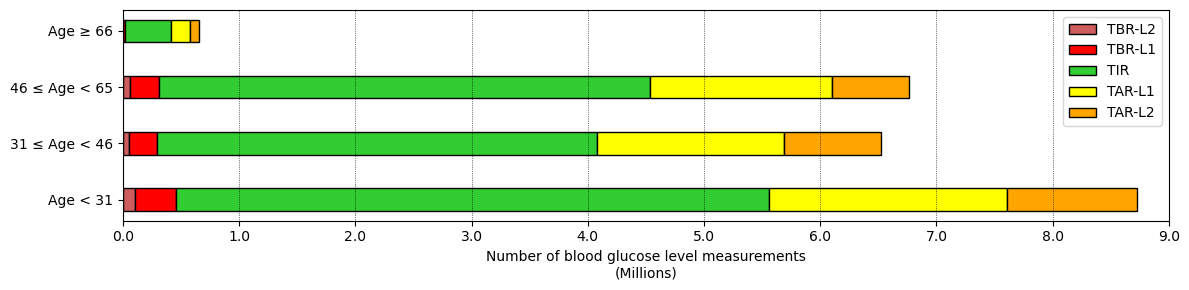

In [33]:
categories = ['Age < 31', '31 ≤ Age < 46', '46 ≤ Age < 65', 'Age ≥ 66']
young_values = array2d[0, :].tolist()
young_adults_values = array2d[1, :].tolist()
adults_values = array2d[2, :].tolist()
elder_values = array2d[3, :].tolist()

fig = plt.figure(figsize =(12, 3), tight_layout = True)
ax = fig.add_subplot(111)

# Combine all values into a single NumPy array
all_values = np.array([young_values, young_adults_values, adults_values, elder_values]).T

# Calculate the positions for the bars
y = np.arange(len(categories))

# Create the stacked bar graph
range_labels = ['TBR-L2', 'TBR-L1', 'TIR', 'TAR-L1', 'TAR-L2']
bar_colors = ['indianred', 'red', 'limegreen', 'yellow', 'orange']
ax.barh(y, all_values[0], label=range_labels[0], edgecolor = "black", height=0.4, color=bar_colors[0])
ax.grid(axis='x', linestyle=':', linewidth='0.5', color='black')

for i in range(1, len(all_values)):
    ax.barh(y, all_values[i], left=np.sum(all_values[:i], axis=0), label=range_labels[i], color=bar_colors[i], height=0.4, edgecolor = "black")

x_title = ax.set_xlabel('Number of blood glucose level measurements\n(Millions)')

x_ticks_values = np.arange(0, 9000001, 1000000)
x_ticks_labels = list(map(str, x_ticks_values/1000000))
x_ticks = ax.xaxis.set_ticks(x_ticks_values)
x_labels = ax.xaxis.set_ticklabels(x_ticks_labels)

lim = ax.set_xlim(xmax=9000000)

ax.set_yticks(y)
ax.set_yticklabels(categories)

legend = ax.legend()

plt.show()

## Date and Measurement
### Number of measurements by year

In [34]:
years = ['2018', '2019', '2020', '2021', '2022']
year_number_list = []
for current_year in years:
    current_number = df_glucose_measurements['Measurement_date'].apply(func=lambda x: x[:4] == current_year).value_counts()[True]
    print('Measurements in ', current_year, current_number)
    year_number_list.append(current_number)

Measurements in  2018 593288
Measurements in  2019 1696798
Measurements in  2020 5059226
Measurements in  2021 12002821
Measurements in  2022 3319575


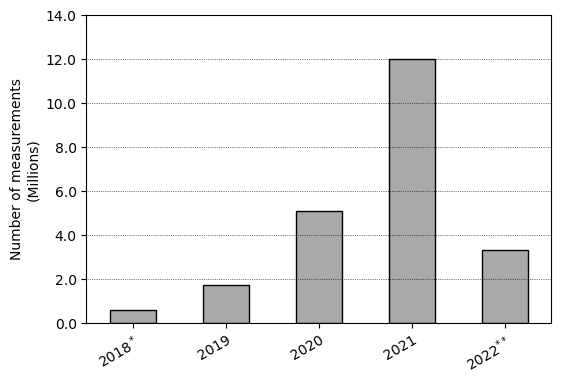

In [35]:
years[0] = '2018$^*$'
years[4] = '2022$^{**}$'
series_measurements_by_year = pd.Series(data=year_number_list, index=years)

ax = series_measurements_by_year.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

y_ticks_values = np.arange(0, 14000001, 2000000)
y_ticks_labels = list(map(str, y_ticks_values/1000000))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Number of measurements\n(Millions)')


$^*$ Since January 6th. $^{**}$ Until March 21st.

### Number of glucose levels measurements per day

In [36]:
start_date = df_glucose_measurements['Measurement_date'].min()
end_date = df_glucose_measurements['Measurement_date'].max()

arr_dates = pd.date_range(start_date, end_date, freq='D').values

In [37]:
arr_zeros_glucose = np.zeros(arr_dates.size, dtype=np.int32)

series_dates_and_glucose_values = pd.Series(index=arr_dates, data=arr_zeros_glucose)

for ith_date in series_dates_and_glucose_values.index:
    ith_str_date = ith_date.date().strftime('%Y-%m-%d')
    current_day_measurement_number = df_glucose_measurements[df_glucose_measurements['Measurement_date'] == ith_str_date].shape[0]
    series_dates_and_glucose_values[ith_date] = current_day_measurement_number
    print(ith_str_date + ' -> ' + str(current_day_measurement_number))    

2018-01-06 -> 42
2018-01-07 -> 95
2018-01-08 -> 128
2018-01-09 -> 159
2018-01-10 -> 182
2018-01-11 -> 210
2018-01-12 -> 286
2018-01-13 -> 283
2018-01-14 -> 253
2018-01-15 -> 269
2018-01-16 -> 284
2018-01-17 -> 279
2018-01-18 -> 284
2018-01-19 -> 248
2018-01-20 -> 222
2018-01-21 -> 263
2018-01-22 -> 226
2018-01-23 -> 268
2018-01-24 -> 311
2018-01-25 -> 370
2018-01-26 -> 380
2018-01-27 -> 375
2018-01-28 -> 364
2018-01-29 -> 379
2018-01-30 -> 379
2018-01-31 -> 359
2018-02-01 -> 359
2018-02-02 -> 371
2018-02-03 -> 315
2018-02-04 -> 256
2018-02-05 -> 222
2018-02-06 -> 192
2018-02-07 -> 154
2018-02-08 -> 159
2018-02-09 -> 188
2018-02-10 -> 189
2018-02-11 -> 177
2018-02-12 -> 191
2018-02-13 -> 186
2018-02-14 -> 186
2018-02-15 -> 191
2018-02-16 -> 204
2018-02-17 -> 267
2018-02-18 -> 274
2018-02-19 -> 289
2018-02-20 -> 287
2018-02-21 -> 295
2018-02-22 -> 332
2018-02-23 -> 378
2018-02-24 -> 353
2018-02-25 -> 310
2018-02-26 -> 374
2018-02-27 -> 357
2018-02-28 -> 364
2018-03-01 -> 298
2018-03-02 -

### Number of patients per day

In [38]:
arr_zeros_participants = np.zeros(arr_dates.size, dtype=np.int32)
series_dates_and_patient_number = pd.Series(index=arr_dates, data=arr_zeros_participants)

for ith_date in series_dates_and_patient_number.index:
    ith_str_date = ith_date.date().strftime('%Y-%m-%d')
    current_day_participant_number = df_glucose_measurements[df_glucose_measurements['Measurement_date'] == ith_str_date]['Patient_ID'].unique().size
    series_dates_and_patient_number[ith_date] = current_day_participant_number
    print(ith_str_date + ' -> ' + str(current_day_participant_number))


2018-01-06 -> 1
2018-01-07 -> 1
2018-01-08 -> 2
2018-01-09 -> 2
2018-01-10 -> 2
2018-01-11 -> 3
2018-01-12 -> 3
2018-01-13 -> 3
2018-01-14 -> 3
2018-01-15 -> 3
2018-01-16 -> 3
2018-01-17 -> 3
2018-01-18 -> 3
2018-01-19 -> 3
2018-01-20 -> 3
2018-01-21 -> 3
2018-01-22 -> 3
2018-01-23 -> 4
2018-01-24 -> 4
2018-01-25 -> 4
2018-01-26 -> 4
2018-01-27 -> 4
2018-01-28 -> 4
2018-01-29 -> 4
2018-01-30 -> 4
2018-01-31 -> 4
2018-02-01 -> 4
2018-02-02 -> 4
2018-02-03 -> 4
2018-02-04 -> 3
2018-02-05 -> 3
2018-02-06 -> 2
2018-02-07 -> 2
2018-02-08 -> 2
2018-02-09 -> 2
2018-02-10 -> 2
2018-02-11 -> 2
2018-02-12 -> 2
2018-02-13 -> 2
2018-02-14 -> 2
2018-02-15 -> 2
2018-02-16 -> 3
2018-02-17 -> 3
2018-02-18 -> 4
2018-02-19 -> 4
2018-02-20 -> 3
2018-02-21 -> 4
2018-02-22 -> 5
2018-02-23 -> 4
2018-02-24 -> 4
2018-02-25 -> 4
2018-02-26 -> 4
2018-02-27 -> 4
2018-02-28 -> 4
2018-03-01 -> 4
2018-03-02 -> 4
2018-03-03 -> 3
2018-03-04 -> 3
2018-03-05 -> 2
2018-03-06 -> 2
2018-03-07 -> 2
2018-03-08 -> 1
2018-03-

### Plot of the two times series

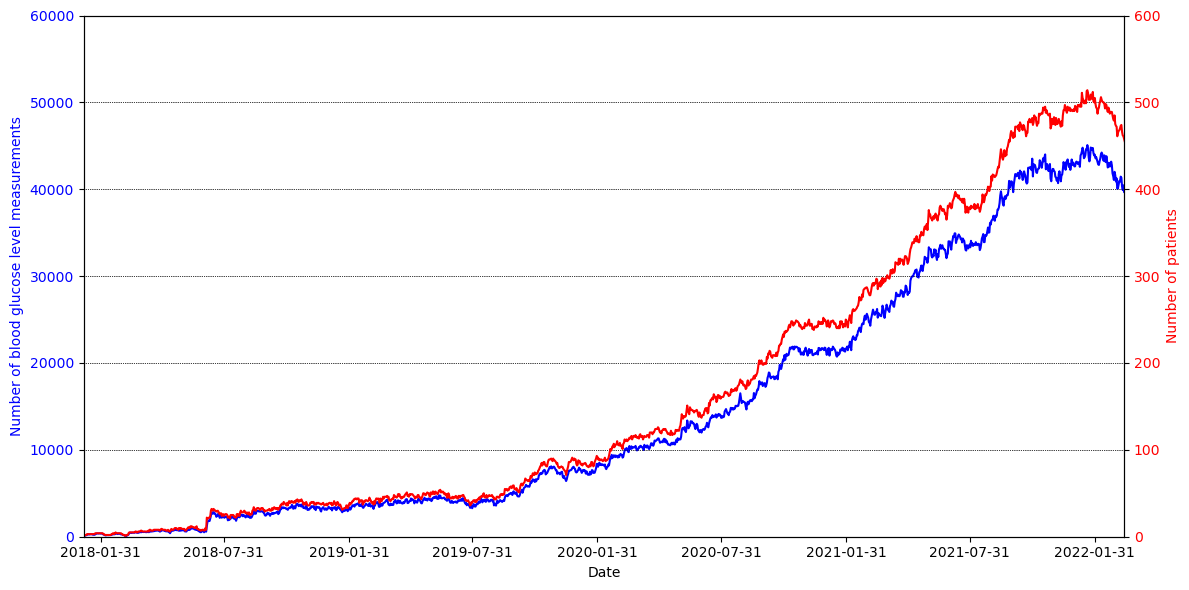

In [39]:
fig = plt.figure(figsize =(12, 6), tight_layout = True)
ax1 = fig.add_subplot(111)

delay = 0

ax1.plot(series_dates_and_glucose_values[:series_dates_and_glucose_values.size - delay].index, series_dates_and_glucose_values[:series_dates_and_glucose_values.size - delay].values, color='blue')
ax1.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

date_list = pd.date_range(start_date, end_date, freq='6M').tolist()
date_series = pd.Series(date_list)
date_series = date_series.apply(lambda x: x.date())

bins_x = date_series
x_ticks_labels = list(map(str, bins_x))
x_ticks = ax1.xaxis.set_ticks(bins_x)
x_labels = ax1.xaxis.set_ticklabels(x_ticks_labels)

y_ticks_values = np.arange(0, 60001, 10000)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax1.yaxis.set_ticks(y_ticks_values)
y_labels = ax1.yaxis.set_ticklabels(y_ticks_labels)

plt.yticks(color='blue')

y_title = ax1.set_ylabel('Number of blood glucose level measurements', color='blue')
x_title = ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2.plot(series_dates_and_patient_number[:series_dates_and_patient_number.size - delay].index, series_dates_and_patient_number[:series_dates_and_patient_number.size - delay].values, color='red')
ax2.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

y_title = ax2.set_ylabel('Number of patients', color='red')

plt.yticks(color='red')

y_ticks_values = np.arange(0, 601, 100)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax2.yaxis.set_ticks(y_ticks_values)
y_labels = ax2.yaxis.set_ticklabels(y_ticks_labels)

lim = ax1.set_ylim(ymin=0, ymax=60000)
lim = ax2.set_ylim(ymin=0, ymax=600)
lim = ax2.set_ylim(ymin=0)
lim = ax1.set_xlim(xmin=datetime.date(2018,1,6), xmax=datetime.date(2022,3,15))

plt.show()

## Gaps distribution

### Concat times columns and converted to datetime format

In [40]:
df_glucose_measurements['timestamp'] = df_glucose_measurements['Measurement_date'] + ' ' + df_glucose_measurements['Measurement_time'] 
df_glucose_measurements['timestamp'] = pd.to_datetime(df_glucose_measurements['timestamp'])

### Find difference between measurements by participant

In [41]:
acc_series = pd.Series()
counter = 1
for current_patient in df_glucose_measurements['Patient_ID'].unique():
    df_current_patient = df_glucose_measurements[df_glucose_measurements['Patient_ID'] == current_patient]
    current_diff = df_current_patient['timestamp'].diff()
    acc_series = pd.concat([acc_series, current_diff])
    
    print('Patient ' + str(counter) + ' -->  DONE')
    counter += 1

C:\Users\crleo\AppData\Local\Temp\ipykernel_21348\739468967.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc_series = pd.Series()


Patient 1 -->  DONE
Patient 2 -->  DONE
Patient 3 -->  DONE
Patient 4 -->  DONE
Patient 5 -->  DONE
Patient 6 -->  DONE
Patient 7 -->  DONE
Patient 8 -->  DONE
Patient 9 -->  DONE
Patient 10 -->  DONE
Patient 11 -->  DONE
Patient 12 -->  DONE
Patient 13 -->  DONE
Patient 14 -->  DONE
Patient 15 -->  DONE
Patient 16 -->  DONE
Patient 17 -->  DONE
Patient 18 -->  DONE
Patient 19 -->  DONE
Patient 20 -->  DONE
Patient 21 -->  DONE
Patient 22 -->  DONE
Patient 23 -->  DONE
Patient 24 -->  DONE
Patient 25 -->  DONE
Patient 26 -->  DONE
Patient 27 -->  DONE
Patient 28 -->  DONE
Patient 29 -->  DONE
Patient 30 -->  DONE
Patient 31 -->  DONE
Patient 32 -->  DONE
Patient 33 -->  DONE
Patient 34 -->  DONE
Patient 35 -->  DONE
Patient 36 -->  DONE
Patient 37 -->  DONE
Patient 38 -->  DONE
Patient 39 -->  DONE
Patient 40 -->  DONE
Patient 41 -->  DONE
Patient 42 -->  DONE
Patient 43 -->  DONE
Patient 44 -->  DONE
Patient 45 -->  DONE
Patient 46 -->  DONE
Patient 47 -->  DONE
Patient 48 -->  DONE
P

### Convert in series of minutes

In [42]:
acc_series_minutes = acc_series.apply(lambda x: x.total_seconds()/60)


### Series of minutes stats

#### Most common intervals percentages

In [43]:
print((acc_series_minutes.value_counts()[:10]/acc_series_minutes.size*100).round(2))

15.0    90.30
16.0     3.93
14.0     1.29
17.0     0.72
1.0      0.30
13.0     0.23
2.0      0.23
3.0      0.21
12.0     0.21
4.0      0.20
11.0     0.20
8.0      0.19
7.0      0.19
18.0     0.19
6.0      0.19
9.0      0.19
5.0      0.18
10.0     0.18
dtype: float64


#### Intervals above 17

In [44]:
print('Number of intervals above 17 minutes:')
print(acc_series_minutes[acc_series_minutes >= 18].size)

print()

print('Percentage of intervals above 17 minutes of all measurments:')
print(round(acc_series_minutes[acc_series_minutes >= 18].size/acc_series_minutes.size*100, 2))

Number of intervals above 17 minutes:
215184

Percentage of intervals above 17 minutes of all measurments:
0.95


### Boxplot of the conceptual gaps

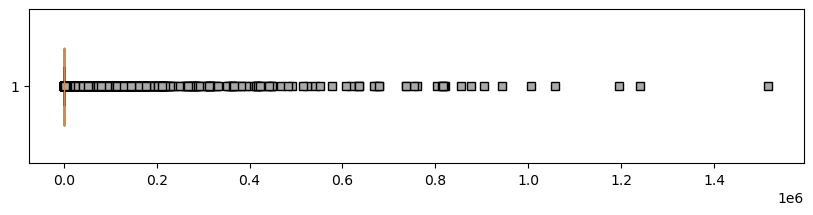

In [45]:
darkgray_square = dict(markerfacecolor='darkgray', marker='s')
fig, ax = plt.subplots(figsize=(10,2))

acc_series_minutes_filt = acc_series_minutes[(acc_series_minutes >= 18) ]

bp = ax.boxplot(acc_series_minutes_filt, vert=False, flierprops=darkgray_square, widths=0.5)
plt.show()

### Boxplot values

In [46]:
for key in bp:
    print(f'{key}: {[item.get_xdata() for item in bp[key]]}\n')

whiskers: [array([19., 18.]), array([185., 434.])]

caps: [array([18., 18.]), array([434., 434.])]

boxes: [array([ 19.,  19., 185., 185.,  19.])]

medians: [array([77., 77.])]

fliers: [array([   555., 372810.,   1576., ...,   1217.,    660.,   2326.])]

means: []


### Gaps histogram

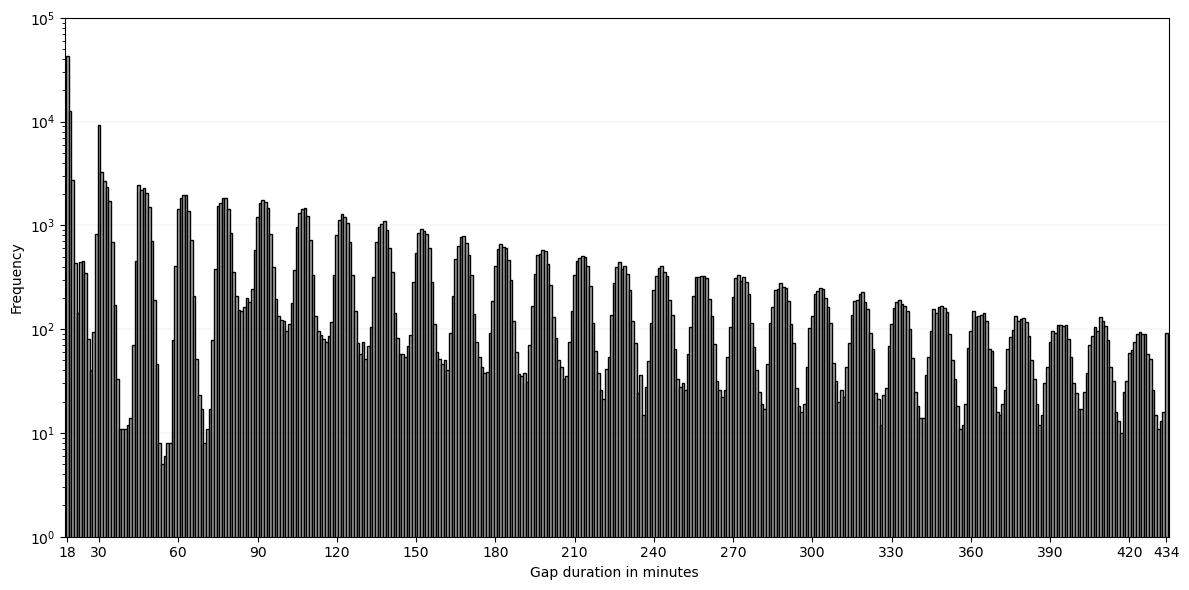

In [47]:
fig = plt.figure(figsize =(12, 6), tight_layout = True)
ax = fig.add_subplot(111)

range_start = 18
range_end = 434
line_width = 1
logarithmic_version = True


bin_set = np.arange(range_start, range_end + 2, line_width)
n, bins, patches = ax.hist(acc_series_minutes, histtype='bar', align='left', bins=bin_set, color='darkgray', edgecolor = "black", log=logarithmic_version)
ax.grid(axis='y', linestyle=':', linewidth='0.1', color='black')

bins_x = np.arange(30,440,30)

bins_x = np.insert(bins_x, 0, 18)
bins_x = np.append(bins_x, 434)

x_ticks_labels = list(map(str, bins_x))
x_ticks = ax.xaxis.set_ticks(bins_x)
x_labels = ax.xaxis.set_ticklabels(x_ticks_labels)

y_ticks_values = np.array([10**0, 10**1, 10**2, 10**3, 10**4, 10**5])
y_ticks_labels = list(map(str, ['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$']))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

lim = ax.set_xlim(xmin=17,xmax=435)

# lim = ax2.set_ylim(ymin=0, ymax=550)

y_title = ax.set_ylabel('Frequency')

x_title = ax.set_xlabel('Gap duration in minutes ')

plt.show()

# ***Biochemical_parameters.csv***

## Number of records by biochemical parameters name.

### Bar graph

In [48]:
bioch_params_bar_values = df_biochemical_parameters['Name'].value_counts()

ax = bioch_params_bar_values.plot(kind='bar', figsize=(12,6), color='darkgray', width=0.7, edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

y_ticks_values = np.arange(0, 9001, 1000)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

plt.show()

y_title = ax.set_ylabel('Number of records')

## Table of the summary of statistics of the number of biochemical parameters per patient.

In [49]:
patient_list = df_patient_info['Patient_ID'].unique()
parameter_list = df_biochemical_parameters['Name'].unique()

long_patient_list = np.repeat(patient_list, 17)

long_parm_list = np.tile(parameter_list, (736))


### Dataframe to fill
With the data of the number of biochemical parameters per type per patient

In [50]:
df_bio_param_report = pd.DataFrame({'Patient_ID':long_patient_list, 'Name':long_parm_list})
df_bio_param_report['sum'] = 0

### Get number of biochemical parameters per patient 

In [51]:
for current_index in range(0, df_bio_param_report.shape[0]):
    current_patient = df_bio_param_report.loc[current_index, 'Patient_ID']
    current_bio_param = df_bio_param_report.loc[current_index, 'Name']
    df_bio_param_report.loc[current_index, 'sum'] = df_biochemical_parameters[(df_biochemical_parameters['Patient_ID'] == current_patient) & (df_biochemical_parameters['Name'] == current_bio_param)].shape[0]    


In [52]:
df_table_general = df_bio_param_report.drop(columns=['Patient_ID']).groupby('Name').agg(['mean', 'std', 'median', 'min', 'max', 'sum']).reset_index()
df_table_general = df_table_general.round(2)
df_table_general.columns = ['Name', 'Mean', 'STD', 'Median', 'Minimum', 'Maximum', 'Total']
df_table_general

Name   Mean    STD  Median  Minimum  Maximum  \
0         Alanine transaminase (GPT)   9.69   8.85     8.0        0       90   
1                    Albumin (urine)   5.82   2.88     6.0        0       21   
2                           Chlorine   2.63   6.40     1.0        0       74   
3                         Creatinine  11.54  12.05     9.0        0      115   
4                 Creatinine (urine)   5.99   3.15     6.0        0       27   
5   Gamma-glutamyl Transferase (GGT)   8.27   7.68     7.0        0       89   
6                            Glucose  11.34  11.63     9.0        0      111   
7          Glycated hemoglobin (A1c)   6.49   2.76     7.0        0       16   
8                    HDL cholesterol   6.88   3.48     7.0        0       26   
9                     IA2 ANTIBODIES   0.09   0.30     0.0        0        2   
10                           Insulin   0.09   0.41     0.0        0        6   
11                         Potassium  10.67  11.72     8.0        0      108   
12                            Sodium  10.62  11.54     8.0        0      107   
13                 Thyrotropin (TSH)   6.21   3.13     6.0        0       17   
14                 Total cholesterol   8.09   4.92     7.0        0       40   
15                     Triglycerides   7.87   4.65     7.0        0       36   
16                         Uric acid   6.57   4.81     6.0        0       41   

    Total  
0    7134  
1    4283  
2    1935  
3    8495  
4    4412  
5    6085  
6    8349  
7    4776  
8    5062  
9      66  
10     64  
11   7853  
12   7814  
13   4570  
14   5954  
15   5791  
16   4839

In [53]:
df_values_table = df_biochemical_parameters.drop(columns=['Patient_ID', 'Reception_date']).groupby('Name').agg(['mean', 'std','median', 'min', 'max']).reset_index()
df_values_table = df_values_table.round(2)
df_values_table.columns = ['Name', 'Mean', 'STD', 'Median', 'Minimum', 'Maximum']
df_values_table['Total'] = df_table_general['Total']
df_values_table

Name    Mean      STD  Median  Minimum  \
0         Alanine transaminase (GPT)   26.98    44.62   19.00    -4.00   
1                    Albumin (urine)    4.86    26.56    0.70     0.01   
2                           Chlorine  102.96     5.34  103.00    76.00   
3                         Creatinine    1.04     0.95    0.80     0.15   
4                 Creatinine (urine)  114.14    66.80  101.41     2.00   
5   Gamma-glutamyl Transferase (GGT)   43.80   113.55   19.00     5.00   
6                            Glucose  163.04    85.40  146.00    10.00   
7          Glycated hemoglobin (A1c)    7.82     1.39    7.60     4.00   
8                    HDL cholesterol   56.63    14.37   55.00     7.00   
9                     IA2 ANTIBODIES  409.64  1237.70    1.15     0.21   
10                           Insulin   22.69    40.54   10.24     0.74   
11                         Potassium    4.43     0.66    4.40     1.90   
12                            Sodium  138.16     3.47  138.00   117.00   
13                 Thyrotropin (TSH)    2.87     4.68    2.22     0.01   
14                 Total cholesterol  169.45    39.93  167.00    27.00   
15                     Triglycerides  102.97    94.69   81.00    23.00   
16                         Uric acid    4.39     1.54    4.20     1.00   

    Maximum  Total  
0    868.00   7134  
1    992.20   4283  
2    136.00   1935  
3     11.55   8495  
4    543.46   4412  
5   2051.00   6085  
6    979.00   8349  
7     18.00   4776  
8    137.00   5062  
9   6446.74     66  
10   298.50     64  
11    22.60   7853  
12   168.00   7814  
13   204.89   4570  
14   703.00   5954  
15  3447.00   5791  
16    14.20   4839

## Distribution of the values of the most commonly measured biochemical parameters.

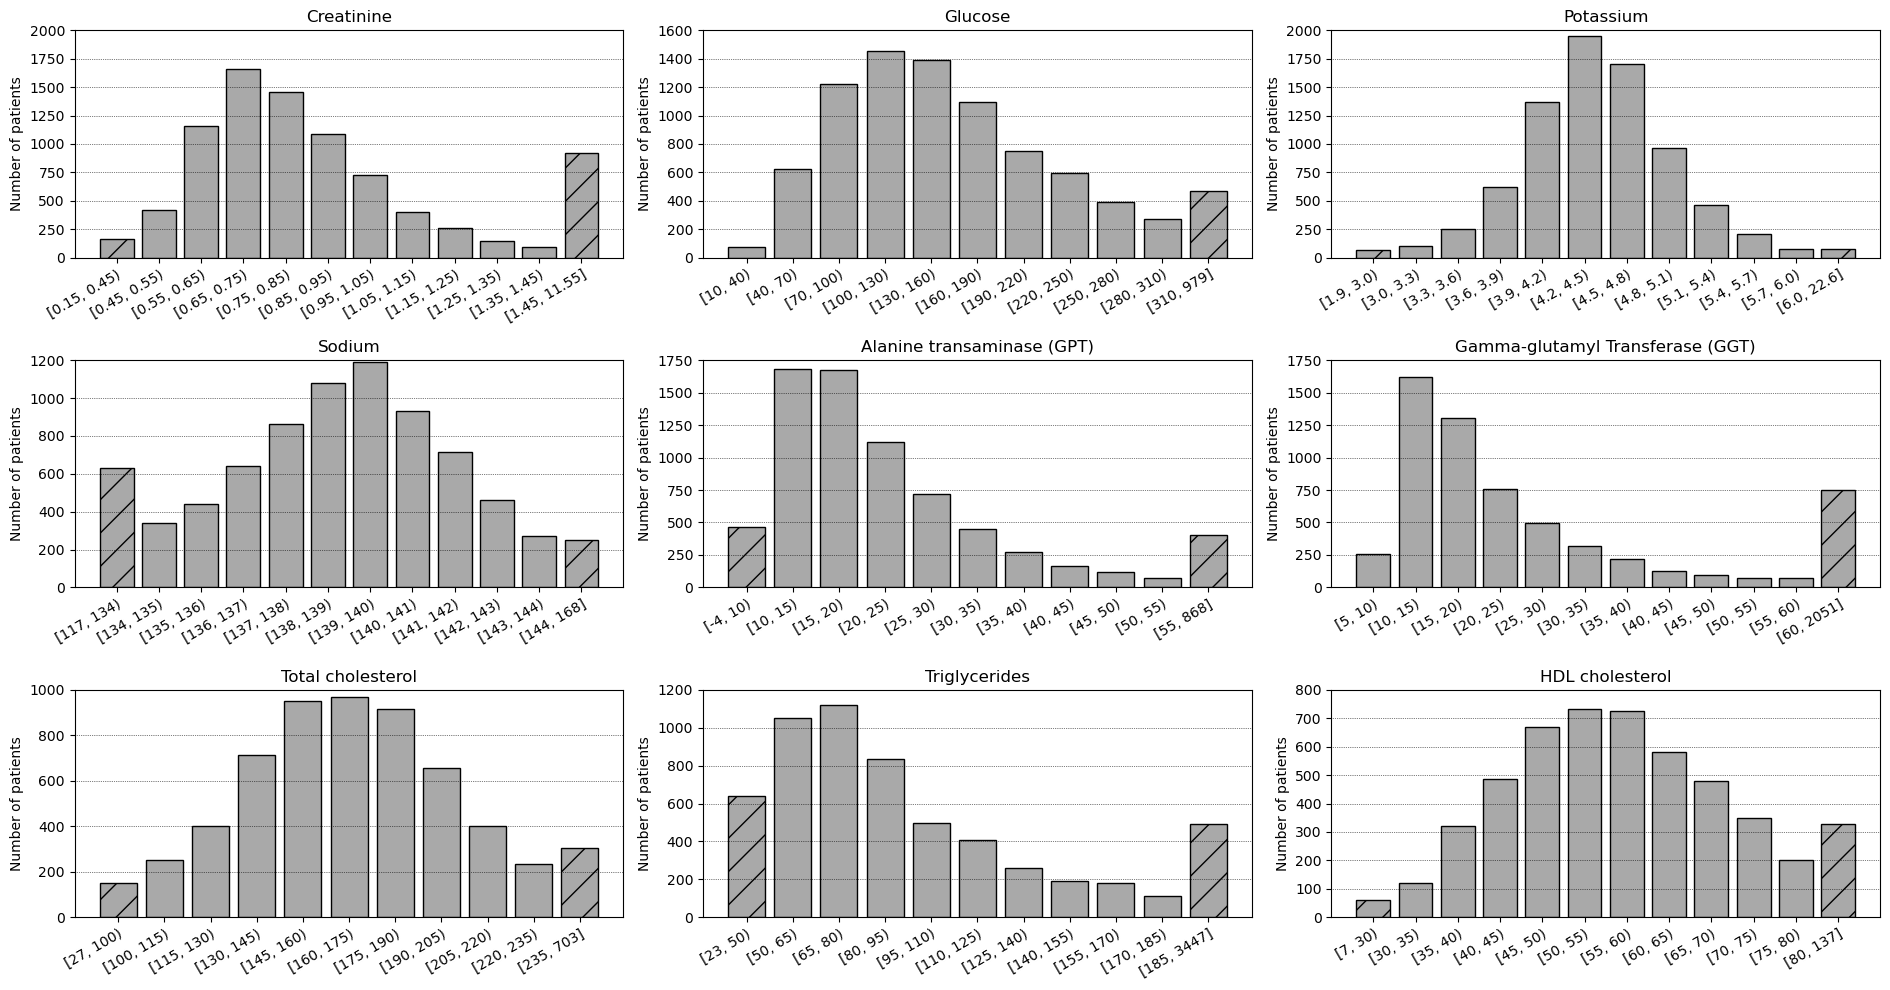

In [54]:
bioch_params_common = bioch_params_bar_values[:9].index.values

fig = plt.figure(figsize =(19, 10), tight_layout = True)

# VALUE 0 ---------------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[0]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,1)

x_values = np.arange(0.45, 1.46, 0.1)
x_values = np.insert(x_values, 0, 0.15)
x_values = np.append(x_values, 11.55)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = np.round(x_values[x_ith], 2)
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = np.round(x_values[x_ith], 2)

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray', hatch=['/','','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

y_ticks_values = np.arange(0,2001, 250)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

title = ax.set_title(bioch_params_common[0])
y_title = ax.set_ylabel('Number of patients')

# VALUE 1 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[1]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,2)

x_values = np.arange(10, 311, 30)
x_values = np.append(x_values, 979)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = x_values[x_ith]
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = x_values[x_ith]

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray',hatch=['','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

y_ticks_values = np.arange(0,1601, 200)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

title = ax.set_title(bioch_params_common[1])
y_title = ax.set_ylabel('Number of patients')

# VALUE 2 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[2]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,3)

x_values = np.arange(3.0, 6.01, 0.3)
x_values = np.insert(x_values, 0,1.9)
x_values = np.append(x_values, 22.6)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = np.round(x_values[x_ith], 2)
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = np.round(x_values[x_ith], 2)

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray',hatch=['/','','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

y_ticks_values = np.arange(0,2001, 250)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

lim = ax.set_ylim(ymax=2000)

title = ax.set_title(bioch_params_common[2])
y_title = ax.set_ylabel('Number of patients')

# VALUE 3 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[3]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,4)

x_values = np.arange(134, 145, 1)
x_values = np.insert(x_values, 0,117)
x_values = np.append(x_values, 168)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = np.round(x_values[x_ith], 2)
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = np.round(x_values[x_ith], 2)

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray',hatch=['/','','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

lim = ax.set_ylim(ymax=1200)

title = ax.set_title(bioch_params_common[3])
y_title = ax.set_ylabel('Number of patients')

# VALUE 4 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[4]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,5)

x_values = np.arange(10, 56, 5)
x_values = np.insert(x_values, 0, -4)
x_values = np.append(x_values, 868)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = np.round(x_values[x_ith], 2)
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = np.round(x_values[x_ith], 2)

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray',hatch=['/','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

lim = ax.set_ylim(ymax=1750)

title = ax.set_title(bioch_params_common[4])
y_title = ax.set_ylabel('Number of patients')

# VALUE 5 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[5]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,6)

x_values = np.arange(5, 61, 5)
x_values = np.append(x_values, 2051)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = x_values[x_ith]
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = x_values[x_ith]

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray',hatch=['','','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

y_ticks_values = np.arange(0,1751, 250)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

title = ax.set_title(bioch_params_common[5])
y_title = ax.set_ylabel('Number of patients')

# VALUE 6 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[6]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,7)

x_values = np.arange(100, 250, 15)
x_values = np.insert(x_values, 0, 27)
x_values = np.append(x_values, 703)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = x_values[x_ith]
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = x_values[x_ith]

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray', hatch=['/','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

lim = ax.set_ylim(ymax=1000)

title = ax.set_title(bioch_params_common[6])
y_title = ax.set_ylabel('Number of patients')

# VALUE 7 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[7]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,8)

x_values = np.arange(50, 200, 15)
x_values = np.insert(x_values, 0, 23)
x_values = np.append(x_values, 3447)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = x_values[x_ith]
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = x_values[x_ith]

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray', hatch=['/','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

y_ticks_values = np.arange(0,1201, 200)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

title = ax.set_title(bioch_params_common[7])
y_title = ax.set_ylabel('Number of patients')

# VALUE 8 ------------------------------------------------------------------------------
current_filter = df_biochemical_parameters['Name'] == bioch_params_common[8]
series_current = df_biochemical_parameters[current_filter]['Value']

ax = fig.add_subplot(3,3,9)

x_values = np.arange(30, 85, 5)
x_values = np.insert(x_values, 0, 7)
x_values = np.append(x_values, 137)

height_val = np.array([])
x_lab = np.array([])
inf = x_values[0]
for x_ith in range(1, x_values.size):
    sup = x_values[x_ith]
    current_number = series_current[(series_current >= inf) & (series_current < sup)].size
    height_val = np.append(height_val, current_number)
    x_lab = np.append(x_lab, '[' + str(inf) + ', ' + str(sup) + ')')
    inf = x_values[x_ith]

range_number = len(x_lab)
las_range_length = len(x_lab[range_number - 1])
x_lab[range_number - 1] = (x_lab[range_number - 1][:las_range_length - 1] + ']') # Put a ']' in the last range.

ax.bar(x_lab, height_val, color='darkgray', hatch=['/','','','','','','','','','','','/'], edgecolor = "black")
plt.xticks(rotation = 30, ha='right', rotation_mode='anchor')
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')

y_ticks_values = np.arange(0, 801, 100)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

title = ax.set_title(bioch_params_common[8])
y_title = ax.set_ylabel('Number of patients')

# ***Diagnostics.csv***
## Distribution of patients in the top ten diagnoses.

In [55]:
diagnostics_des = df_diagnostics['Description'].value_counts()
most_common_diag = diagnostics_des.iloc[0:10]

most_common_diag_formatted = most_common_diag.copy()
most_common_diag_formatted.index = ['Unspecified acquired hypothyroidism',
                                   'Unspecified essential hypertension',
                                   'Diabetes with ophthalmic manifestations,\ntype II or unspecified type, not stated as uncontrolled',
                                   'Other and unspecified hyperlipidemia', 'Pure hypercholesterolemia',
                                   'Obesity, unspecified', 'Allergic rhinitis, cause unspecified',
                                   'Diabetes with renal manifestations, type II or\nunspecified type, not stated as uncontrolled',
                                   'Asthma, unspecified type, unspecified',
                                   'Diabetes with neurological manifestations, type II\nor unspecified type, not stated as uncontrolled',
                                    ]

ax = most_common_diag_formatted.plot(kind='bar', figsize=(12, 6), color='darkgray', edgecolor ="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5')
x_labels = ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

y_ticks_values = np.arange(0,101, 20)
y_ticks_labels = list(map(str, y_ticks_values))
y_ticks = ax.yaxis.set_ticks(y_ticks_values)
y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Number of patients')